In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
%matplotlib inline

In [60]:
boston_housing_df = pd.read_csv('BostonHousing.csv',header='infer',index_col=None,usecols=None) #Loading data

In [61]:
boston_housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
import os
print(os.getcwd())

/Users/anubhav.nanda/Desktop/DeepL/POC/DeepML/notebooks


In [62]:
boston_housing_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [63]:
boston_housing_df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [64]:
print(boston_housing_df.keys()) #to print keys

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv'],
      dtype='object')


In [66]:
boston_housing_df.shape

(506, 14)

In [65]:
boston_housing_df.columns

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv'],
      dtype='object')

In [67]:
corr = boston_housing_df.corr()

In [68]:
sns.set() #setting sns default default seaborn theme, scaling, and color palette
sns.set(color_codes=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c233add90>,
      dtype=object)

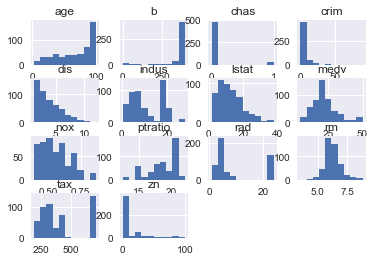

In [24]:
boston_housing_df.hist()

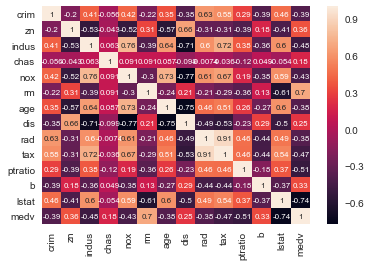

In [69]:
#plt.subplot(figsize=(20,15))
#ax=subplot(111)
sns.heatmap(data=corr,annot=True,annot_kws={"size": 8})

In [39]:
df = boston_housing_df[['rm','lstat','ptratio']]

In [40]:
df.corr()

,rm,lstat,ptratio
rm,1.000000,-0.613808,-0.355501
lstat,-0.613808,1.000000,0.374044
ptratio,-0.355501,0.374044,1.000000


In [42]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

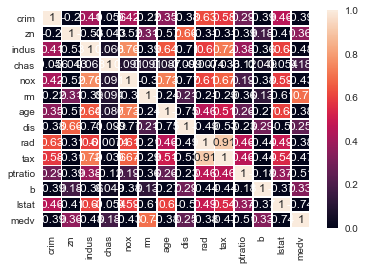

In [70]:
sns.heatmap(corr,cbar=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values,vmin=0,vmax=1,annot=True,linewidths=0.8)

In [72]:
X = boston_housing_df.drop('medv',axis=1)

In [73]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [74]:
Y = boston_housing_df['medv']

In [75]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [77]:
import sklearn.cross_validation
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,Y,test_size=0.33,random_state=5)

/Users/anubhav.nanda/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
print(X_train.shape)

(339, 13)


In [79]:
print(X_test.shape)

(167, 13)


In [80]:
print(Y_train.shape)

(339,)


In [81]:
print(Y_test.shape)

(167,)


In [82]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
Y_pred = lm.predict(X_test)

In [84]:
Y_pred

array([37.46723562, 31.39154701, 27.1201962 ,  6.46843347, 33.62966737,
        5.67067989, 27.03946671, 29.92704748, 26.35661334, 22.45246021,
       32.20504441, 21.78641653, 23.41138441, 33.60894362, 28.28619511,
       15.13859055,  0.30087325, 18.71850376, 14.4706712 , 11.10823598,
        2.69494197, 19.21693734, 38.41159345, 24.36936442, 31.61493439,
       11.42210397, 24.92862188, 23.31178043, 22.7764079 , 20.65081211,
       16.035198  ,  7.07978633, 17.65509209, 22.81470561, 29.21943405,
       18.61354566, 28.37701843,  8.80516873, 41.65140459, 34.02910176,
       20.1868926 ,  3.95600857, 29.69124564, 12.18081256, 27.19403498,
       30.63699231, -6.24952457, 19.9462404 , 21.55123979, 13.36478173,
       20.39068171, 19.87353324, 23.57656877, 13.40141285, 17.66457201,
       24.77424747, 35.31476509, 15.48318159, 28.50764575, 21.72575404,
       20.58142839, 26.08460856, 14.51816968, 32.37494056, 20.80917392,
       12.18932524, 19.45551285, 25.23390429, 21.77302317, 21.30

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
417    10.4
503    23.9
234    29.0
111    22.8
472    23.2
99     33.2
339    19.0
309    20.3
304    36.1
272    24.4
346    17.2
412    17.9
151    19.6
496    19.7
410    15.0
490     8.1
132    23.0
224    44.8
318    23.1
284    32.2
444    10.8
321    23.1
116    21.2
333    22.2
351    24.1
       ... 
386    10.5
62     22.2
191    30.5
312    19.4
155    15.6
18     20.2
328    19.3
198    34.6
372    50.0
0      24.0
60     18.7
108    19.8
298    22.5
138    13.3
370    50.0
445    11.8
428    11.0
481    23.7
55     35.4
488    15.2
250    24.4
3      33.4
227    31.6
450    13.4
199    34.9
48     14.4
281    35.4
42     25.3
115    18.3
26     16.6
Name: medv, Length: 167, dtype: float64

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

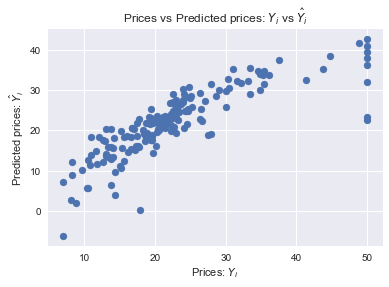

In [86]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [87]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.53045876597469


In [93]:
Y_train.iloc[5]

14.3

In [94]:
X_train.iloc[5]

crim         0.88125
zn           0.00000
indus       21.89000
chas         0.00000
nox          0.62400
rm           5.63700
age         94.70000
dis          1.97990
rad          4.00000
tax        437.00000
ptratio     21.20000
b          396.90000
lstat       18.34000
Name: 129, dtype: float64

In [95]:
X_test.iloc[0]

crim         0.38214
zn           0.00000
indus        6.20000
chas         0.00000
nox          0.50400
rm           8.04000
age         86.50000
dis          3.21570
rad          8.00000
tax        307.00000
ptratio     17.40000
b          387.38000
lstat        3.13000
Name: 226, dtype: float64